In [5]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [6]:
# Baca file CSV
df = pd.read_csv('/content/drive/MyDrive/Semester 6/Machine Learning/ulasan-film.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
# Unduh stopwords (hanya perlu dijalankan sekali)
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = text.lower()  # Mengubah teks menjadi huruf kecil (lowercase)
    text = re.sub(r'<.*?>', '', text)   # Menghapus tag HTML
    # Menghapus angka dan simbol, hanya menyisakan huruf
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Tokenisasi (memecah teks menjadi kata-kata)
    tokens = text.split()
    # Menghapus stopwords dan melakukan stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    # Menggabungkan kembali token menjadi satu string
    return " ".join(tokens)

# Terapkan fungsi preprocessing ke kolom 'review'
df['clean_review'] = df['review'].apply(preprocess)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


sentiment
positive    25000
negative    25000
Name: count, dtype: int64


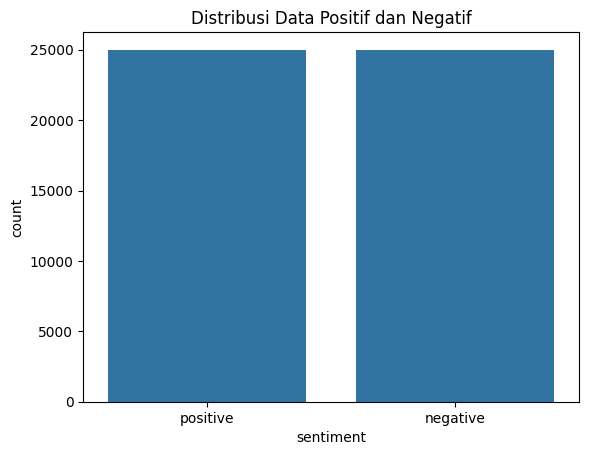

In [8]:
# Hitung jumlah data positif dan negatif
print(df['sentiment'].value_counts())

# Visualisasikan distribusi sentimen
sns.countplot(data=df, x='sentiment')
plt.title("Distribusi Data Positif dan Negatif")
plt.show()

In [9]:
# Ubah label 'positive' -> 1 dan 'negative' -> 0
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [10]:
# TF-IDF vektorisasi dari teks
# Mengambil 5000 fitur kata yang paling sering muncul
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_review']).toarray()
y = df['label']

In [11]:
# Split 80% data training dan 20% data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Inisialisasi dan latih model Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [13]:
# Prediksi pada data test
y_pred = model.predict(X_test)

In [14]:
# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Akurasi Model:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[4179  782]
 [ 704 4335]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4961
           1       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Akurasi Model: 0.8514


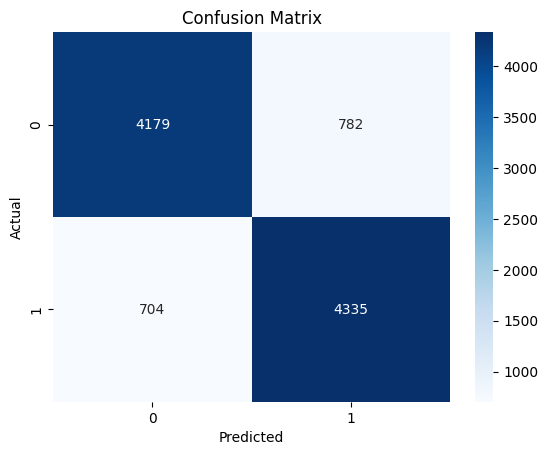

In [15]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()